In [1]:
using Plots
include("layers.jl");

In [2]:
net = Network([FullyConnected(size=(6, 2), activation=ReLU),
               FullyConnected(size=(3, 6), activation=ReLU),
               FullyConnected(size=(1, 3), activation=sigmoid),
               ]);

In [3]:
function condition(x)
    if (x[1] - 0.5)^2 + (x[2] - 0.5)^2 < 0.1
        y = 1
    else
        y = 0
    end
    return y
end

X = [];
Y = [];
n = 500;
for i in 1:n
    x = rand(2)
    y = condition(x)
    X = append!(X, [x])
    Y = append!(Y, y) 
end
X1 = [X[i][1] for i in 1:n]
X2 = [X[i][2] for i in 1:n]
Ypi = predict(net, X);

In [4]:
α, batch, iters = 1e-3, 256, 1e4
losses = train(net, X, Y, α, batch, iters)
Ypf = predict(net, X);

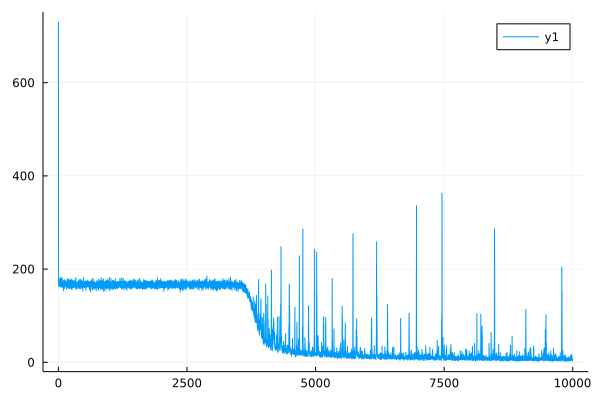

In [5]:
plot(losses)

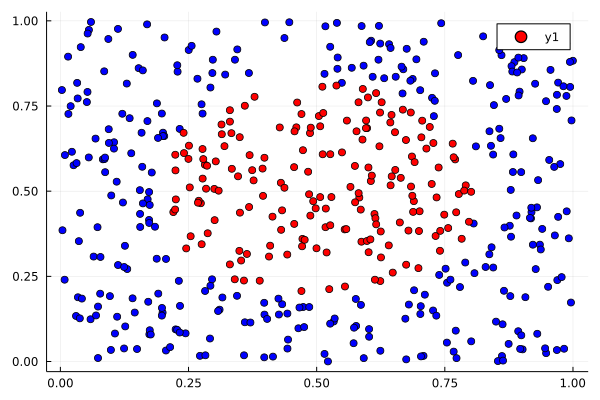

In [6]:
plot(X1, X2, markercolor=color.(Y), seriestype=:scatter)

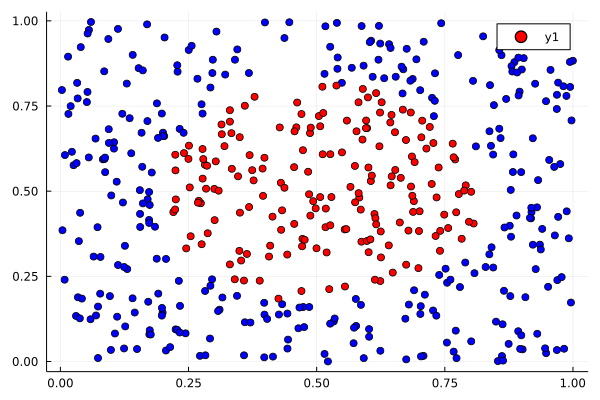

In [7]:
plot(X1, X2, markercolor=color.(Ypf), seriestype=:scatter)

In [8]:
function decision(x, y)
    return forward([x, y], net)[1]
end

decision (generic function with 1 method)

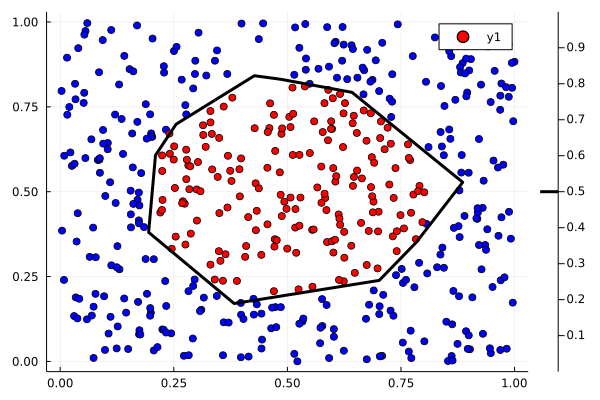

In [12]:
plot(X1, X2, markercolor=color.(Y), seriestype=:scatter)
xs = Array(LinRange(0, 1, 1000))
ys = Array(LinRange(0, 1, 1000))
contour!(xs, ys, decision, levels=[0.5], color=:black, linewidth=3)